In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from sklearn import model_selection
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
data= pd.read_csv("bank.csv")

In [4]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
data=data.drop(["marital","education","contact","day","month"],axis=1)

In [12]:
encoder=LabelEncoder()
data['job']=encoder.fit_transform(data['job'])
data['default']=encoder.fit_transform(data['default'])
data['housing']=encoder.fit_transform(data['housing'])
data['loan']=encoder.fit_transform(data['loan'])
data['poutcome']=encoder.fit_transform(data['poutcome'])
data['deposit']=encoder.fit_transform(data['deposit'])

In [13]:
data.describe()

,age,job,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,0.015051,1528.538524,0.473123,0.130801,371.993818,2.508421,51.330407,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.121761,3225.413326,0.499299,0.337198,347.128386,2.722077,108.758282,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,122.000000,0.000000,0.000000,138.000000,1.000000,-1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,0.000000,550.000000,0.000000,0.000000,255.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,0.000000,1708.000000,1.000000,0.000000,496.000000,3.000000,20.750000,1.000000,3.000000,1.000000
max,95.000000,11.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,63.000000,854.000000,58.000000,3.000000,1.000000


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

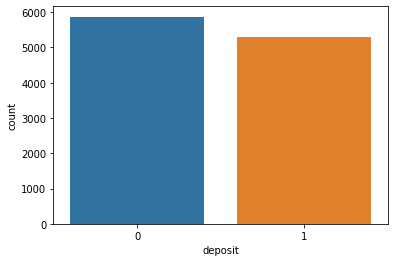

In [18]:
sns.countplot(x='deposit',data=data)
plt.xticks()

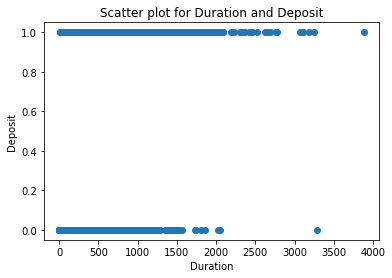

In [23]:
plt.scatter(data["duration"],data["deposit"])
plt.title("Scatter plot for Duration and Deposit")
plt.xlabel("Duration")
plt.ylabel("Deposit")
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

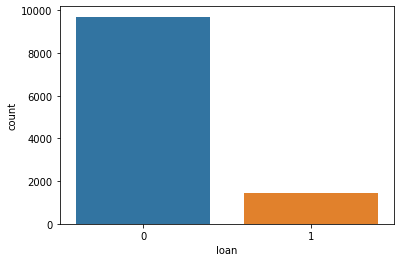

In [20]:
sns.countplot(x='loan',data=data)
plt.xticks()

In [43]:
x=data.drop(["deposit"],axis=1)
y=data["deposit"]
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

model = Sequential()
model.add(Dense(11, input_dim=11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 11)                132       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 12        
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [37]:
x.shape

(11162, 11)

In [45]:
model.fit(np.array(x_train), np.array(y_train), epochs=50, batch_size=128, shuffle=True)

Epoch 1/50
70/70 [==============================] - 0s 751us/step - loss: 63.6559 - accuracy: 0.4909
Epoch 2/50
70/70 [==============================] - 0s 795us/step - loss: 13.0499 - accuracy: 0.5172
Epoch 3/50
70/70 [==============================] - 0s 868us/step - loss: 6.4851 - accuracy: 0.5730
Epoch 4/50
70/70 [==============================] - 0s 695us/step - loss: 3.0869 - accuracy: 0.6548
Epoch 5/50
70/70 [==============================] - 0s 709us/step - loss: 1.4203 - accuracy: 0.6982
Epoch 6/50
70/70 [==============================] - 0s 699us/step - loss: 1.0579 - accuracy: 0.6958
Epoch 7/50
70/70 [==============================] - 0s 689us/step - loss: 0.8844 - accuracy: 0.6894
Epoch 8/50
70/70 [==============================] - 0s 814us/step - loss: 0.7633 - accuracy: 0.6978
Epoch 9/50
70/70 [==============================] - 0s 783us/step - loss: 0.6764 - accuracy: 0.7117
Epoch 10/50
70/70 [==============================] - 0s 691us/step - loss: 0.6186 - accuracy: 0.72

In [46]:
scores = model.evaluate(np.array(x_test), np.array(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

70/70 [==============================] - 0s 535us/step - loss: 0.5241 - accuracy: 0.7618

accuracy: 76.18%
